**Table of contents**<a id='toc0_'></a>    
- [앙상블 기법](#toc1_)    
      - [앙상블 기법 방식](#toc1_1_1_1_)    
      - [투표 방식](#toc1_1_1_2_)    
      - [begging 방식의 대표 주자 - Rnadom Forest](#toc1_1_1_3_)    
- [앙상블 기법 예제](#toc2_)    
  - [HAR dataset(Human Activity Recognition)](#toc2_1_)    
  - [Label Encoding](#toc2_2_)    
  - [Decision Tree](#toc2_3_)    
  - [max_depth를 다양하게 하기 위해 GridSearchCV](#toc2_4_)    
  - [Random Forest 적용](#toc2_5_)    
    - [중요 feature 확인](#toc2_5_1_)    
    - [중요 feature 20개만 가지고 다시 성능 확인](#toc2_5_2_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[앙상블 기법](#toc0_)

- **여러개의 분류기**를 생성하고 그 예측을 결합하여 정확한 최종 예측을 기대하는 기법
<br>
-> 다양한 분류기의 예측 결과를 결합함으로써 단일 분류기보다 신뢰성이 높은 예측 값을 얻는 것

> 현재 정형데이터를 대상으로 하는 분류기에서는 앙상블 기법이 뛰어난 성과를 보여주고 있음

#### <a id='toc1_1_1_1_'></a>[앙상블 기법 방식](#toc0_)

- `voting`
    - 데이터셋을 여러 모델에 넣어보고 투표한 후에 최종 결정하는 것
- `begging`
    - 전체 데이터셋에서 데이터들을 샘플링하여 각 샘플링을 **하나의 모델**에 넣어보고 투표한 후에 최종 결정하는 것
    - 데이터 중복을 허용해서 샘플링 ->  **부트스트래핑 분할 방식**

#### <a id='toc1_1_1_2_'></a>[투표 방식](#toc0_)

- `hard voting`
- `soft voting`

#### <a id='toc1_1_1_3_'></a>[begging 방식의 대표 주자 - Rnadom Forest](#toc0_)

- Decision Tree를 기본으로 함
    - 부트스크래핑으로 샘플링 된 데이터마다 결정나무가 예측한 겨로가를 소프트보팅으로 최종 예측 결론을 얻음
- 앙상블 방법 중에서 비교적 속도가 빠르며 다양한 영역에서 높은 성능을 보여주고 있음

# <a id='toc2_'></a>[앙상블 기법 예제](#toc0_)

## <a id='toc2_1_'></a>[HAR dataset(Human Activity Recognition)](#toc0_)
<br>

[데이터 - UCI HAR dataset](https://archive.ics.uci.edu/dataset/240/human+activity+recognition+using+smartphones)

- 스마트폰을 장착한 사람의 행동을 관찰한 데이터
    - 19-48세 연력으이 30명의 자원 봉사자를 모집하여 수행
    - 6가지 활동(`walking`, `walking_upstairs`, `walking_downstairs`, `sitting`, `standing`, `laying`)
- 스마트폰에 내장된 센서를 사용하여 50Hz의 일정한 속도로 3축 선형 가속 및 3축 각속도를 캡처 
    - gyroscope
    - accelerometer
- 훈련 데이터 생성을 위해 자원 봉사자의 70%가 선택되었고 테스트 데이터는 30%가 선정 

<br>
- 6가지 활동으로 라벨이 구성되어 있음

1. `walking`
2. `walking upstairs`
3. `walking downstairs`
4. `sitting`
5. `standing`
6. `laying`

<br>



In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
column_names = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/refs/heads/master/dataset/HAR_dataset/features.txt'
feature_name_df = pd.read_csv(column_names, sep='\s+', header=None, names=['column_index', 'column_name'])
feature_name_df

,column_index,column_name
0,1,tBodyAcc-mean()-X
1,2,tBodyAcc-mean()-Y
2,3,tBodyAcc-mean()-Z
3,4,tBodyAcc-std()-X
4,5,tBodyAcc-std()-Y
...,...,...
556,557,"angle(tBodyGyroMean,gravityMean)"
557,558,"angle(tBodyGyroJerkMean,gravityMean)"
558,559,"angle(X,gravityMean)"
559,560,"angle(Y,gravityMean)"


In [3]:
len(feature_name_df)

561

In [4]:
feature_name = feature_name_df.iloc[:, 1].values.tolist()
feature_name[:10]

['tBodyAcc-mean()-X',
 'tBodyAcc-mean()-Y',
 'tBodyAcc-mean()-Z',
 'tBodyAcc-std()-X',
 'tBodyAcc-std()-Y',
 'tBodyAcc-std()-Z',
 'tBodyAcc-mad()-X',
 'tBodyAcc-mad()-Y',
 'tBodyAcc-mad()-Z',
 'tBodyAcc-max()-X']

In [5]:
X_train_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/refs/heads/master/dataset/HAR_dataset/train/X_train.txt'
X_test_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/refs/heads/master/dataset/HAR_dataset/test/X_test.txt'

X_train = pd.read_csv(X_train_url, sep='\s+', header=None)
X_test = pd.read_csv(X_test_url, sep='\s+', header=None)

In [6]:
X_train.columns = feature_name
X_test.columns = feature_name
X_train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [7]:

y_train_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/refs/heads/master/dataset/HAR_dataset/train/y_train.txt'
y_test_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/refs/heads/master/dataset/HAR_dataset/test/y_test.txt'

y_train = pd.read_csv(y_train_url, sep='\s+', header=None, names=['action'])
y_test = pd.read_csv(y_test_url, sep='\s+', header=None, names=['action'])

In [8]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7352, 561), (2947, 561), (7352, 1), (2947, 1))

In [ ]:
y_train['action'].value_counts()

action
6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: count, dtype: int64

## <a id='toc2_2_'></a>[Label Encoding](#toc0_)

label이 1-6으로 구성되어있는데, 이를 0-5로 구성되도록 변경

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
le = LabelEncoder()
y = LabelEncoder()
y_train = le.fit_transform(y_train.to_numpy().ravel())
y_test = le.fit_transform(y_test.to_numpy().ravel())

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((7352, 561), (7352,), (2947, 561), (2947,))

## <a id='toc2_3_'></a>[Decision Tree](#toc0_)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt_clf = DecisionTreeClassifier(max_depth=4, random_state=13)
dt_clf.fit(X_train, y_train)

pred = dt_clf.predict(X_test)

accuracy_score(y_test, pred)

0.8096369189005769

## <a id='toc2_4_'></a>[max_depth를 다양하게 하기 위해 GridSearchCV](#toc0_)

In [14]:
from sklearn.model_selection import GridSearchCV

In [16]:
params = {
    'max_depth' : [6, 8, 10, 12, 16, 20, 24]
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, return_train_score=True, n_jobs=-1)

grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=4, random_state=13),
             n_jobs=-1, param_grid={'max_depth': [6, 8, 10, 12, 16, 20, 24]},
             return_train_score=True, scoring='accuracy')

> [Python : GridSearchCV taking too long to finish running](https://stackoverflow.com/questions/72101295/python-gridsearchcv-taking-too-long-to-finish-running) 
>    - GridSearchCV 너무 오래걸려서 n_jobs = -1로 설정하여 모든 CPU cores들을 사용하도록 했다.

In [17]:
grid_cv.best_score_

0.8543335321892183

In [18]:
grid_cv.best_params_

{'max_depth': 8}

In [20]:
cv_results_df = pd.DataFrame(grid_cv.cv_results_)
cv_results_df[['param_max_depth', 'mean_test_score', 'mean_train_score']]

,param_max_depth,mean_test_score,mean_train_score
0,6,0.843444,0.944879
1,8,0.854334,0.982692
2,10,0.847125,0.993369
3,12,0.841958,0.997212
4,16,0.841958,0.999660
5,20,0.842365,0.999966
6,24,0.841821,1.000000


In [21]:
max_depths = [6, 8, 10, 12, 16, 20, 24]

for depth in max_depths:
    dt_clf = DecisionTreeClassifier(max_depth=depth, random_state=156)
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    print(f'Max_depth = {depth}, Accuracy = {accuracy}')

Max_depth = 6, Accuracy = 0.8557855446216491
Max_depth = 8, Accuracy = 0.8707159823549372
Max_depth = 10, Accuracy = 0.8673227010519172
Max_depth = 12, Accuracy = 0.8646080760095012
Max_depth = 16, Accuracy = 0.8574821852731591
Max_depth = 20, Accuracy = 0.8547675602307431
Max_depth = 24, Accuracy = 0.8547675602307431


In [ ]:
best_dt_clf = grid_cv.best_estimator_
pred1 = best_dt_clf.predict(X_test)

accuracy_score(y_test, pred1)

0.8734306073973532

## <a id='toc2_5_'></a>[Random Forest 적용](#toc0_)

In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

params = {
    'max_depth': [6, 8, 10],
    'n_estimators': [50, 100, 200], # Decision Tree를 몇개 쓸지
    'min_samples_leaf': [8, 12], 
    'min_samples_split': [8, 12]
}

rf_clf = RandomForestClassifier(random_state=13, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=RandomForestClassifier(n_jobs=-1, random_state=13),
             n_jobs=-1,
             param_grid={'max_depth': [6, 8, 10], 'min_samples_leaf': [8, 12],
                         'min_samples_split': [8, 12],
                         'n_estimators': [50, 100, 200]})

In [24]:
cv_results_df = pd.DataFrame(grid_cv.cv_results_)

In [25]:
target_col = ['rank_test_score', 'mean_test_score', 'param_n_estimators', 'param_max_depth']
cv_results_df[target_col].sort_values('rank_test_score').head()

,rank_test_score,mean_test_score,param_n_estimators,param_max_depth
28,1,0.915125,100,10
25,1,0.915125,100,10
23,3,0.912813,200,8
20,3,0.912813,200,8
35,5,0.912541,200,10


In [26]:
grid_cv.best_params_

{'max_depth': 10,
 'min_samples_leaf': 8,
 'min_samples_split': 8,
 'n_estimators': 100}

In [27]:
grid_cv.best_score_

0.9151251360174102

In [ ]:
rf_clf_best = grid_cv.best_estimator_
rf_clf_best.fit(X_train, y_train)

pred1 = rf_clf_best.predict(X_test)

accuracy_score(y_test, pred1)

0.9205972175093315

### <a id='toc2_5_1_'></a>[중요 feature 확인](#toc0_)

각 feature들의 중요도가 개별적으로 높지 않음

In [29]:
best_cols_values = rf_clf_best.feature_importances_
best_cols = pd.Series(best_cols_values, index=X_train.columns)
top20_cols = best_cols.sort_values(ascending=False)[:20]
top20_cols

angle(X,gravityMean)               0.034638
tGravityAcc-max()-Y                0.032518
tGravityAcc-energy()-X             0.031309
tGravityAcc-mean()-X               0.029513
tGravityAcc-min()-X                0.027775
tGravityAcc-max()-X                0.027662
angle(Y,gravityMean)               0.026553
tGravityAcc-mean()-Y               0.026052
tGravityAcc-min()-Y                0.023037
tGravityAcc-energy()-Y             0.018678
tGravityAcc-mean()-Z               0.015688
angle(Z,gravityMean)               0.012837
fBodyAcc-mad()-X                   0.012558
tBodyAcc-max()-X                   0.011970
fBodyAccJerk-bandsEnergy()-1,24    0.011803
tBodyAccJerk-entropy()-X           0.011647
tGravityAccMag-std()               0.011451
tBodyAccJerk-energy()-X            0.011333
tGravityAcc-arCoeff()-Z,1          0.011257
fBodyAccJerk-max()-X               0.011040
dtype: float64

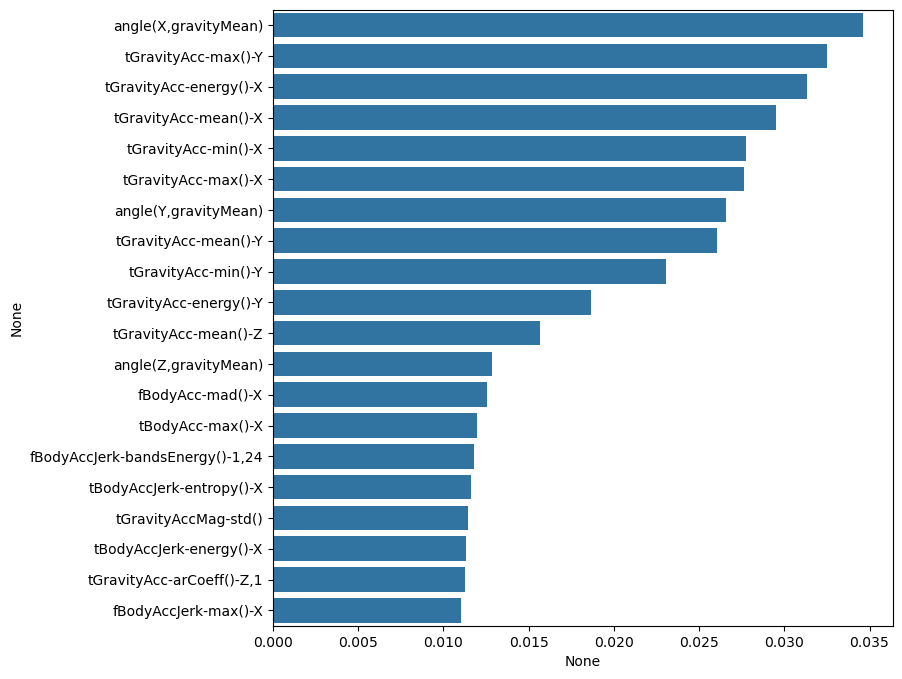

In [42]:
plt.figure(figsize=(8, 8))
sns.barplot(x=top20_cols, y=top20_cols.index)
plt.show()

### <a id='toc2_5_2_'></a>[중요 feature 20개만 가지고 다시 성능 확인](#toc0_)

In [31]:
X_train_re = X_train[top20_cols.index]
X_test_re = X_test[top20_cols.index]

In [40]:
rf_clf_best_re = grid_cv.best_estimator_
rf_clf_best_re.fit(X_train_re, y_train)

pred1_re = rf_clf_best_re.predict(X_test_re)

accuracy_score(y_test, pred1_re)

0.8177807940278249